In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [3]:
# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean212.csv")

In [4]:
# Data exploration and cleaning

In [6]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

array([[<Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'VitD_levels'}>,
        <Axes: title={'center': 'Doc_visits'}>],
       [<Axes: title={'center': 'Full_meals_eaten'}>,
        <Axes: title={'center': 'vitD_supp'}>,
        <Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'TotalCharge'}>,
        <Axes: title={'center': 'Additional_charges'}>],
       [<Axes: title={'center': 'Item1'}>,
        <Axes: title={'center': 'Item2'}>,
        <Axes: title={'center': 'Item3'}>,
        <Axes: title={'center': 'Item4'}>,
        <Axes: title={'center': 'Item5'}>],
       [<Axes: title={'center': 'Item6'}>,
        <Axes: title={'center': 'Item7'}>,
 

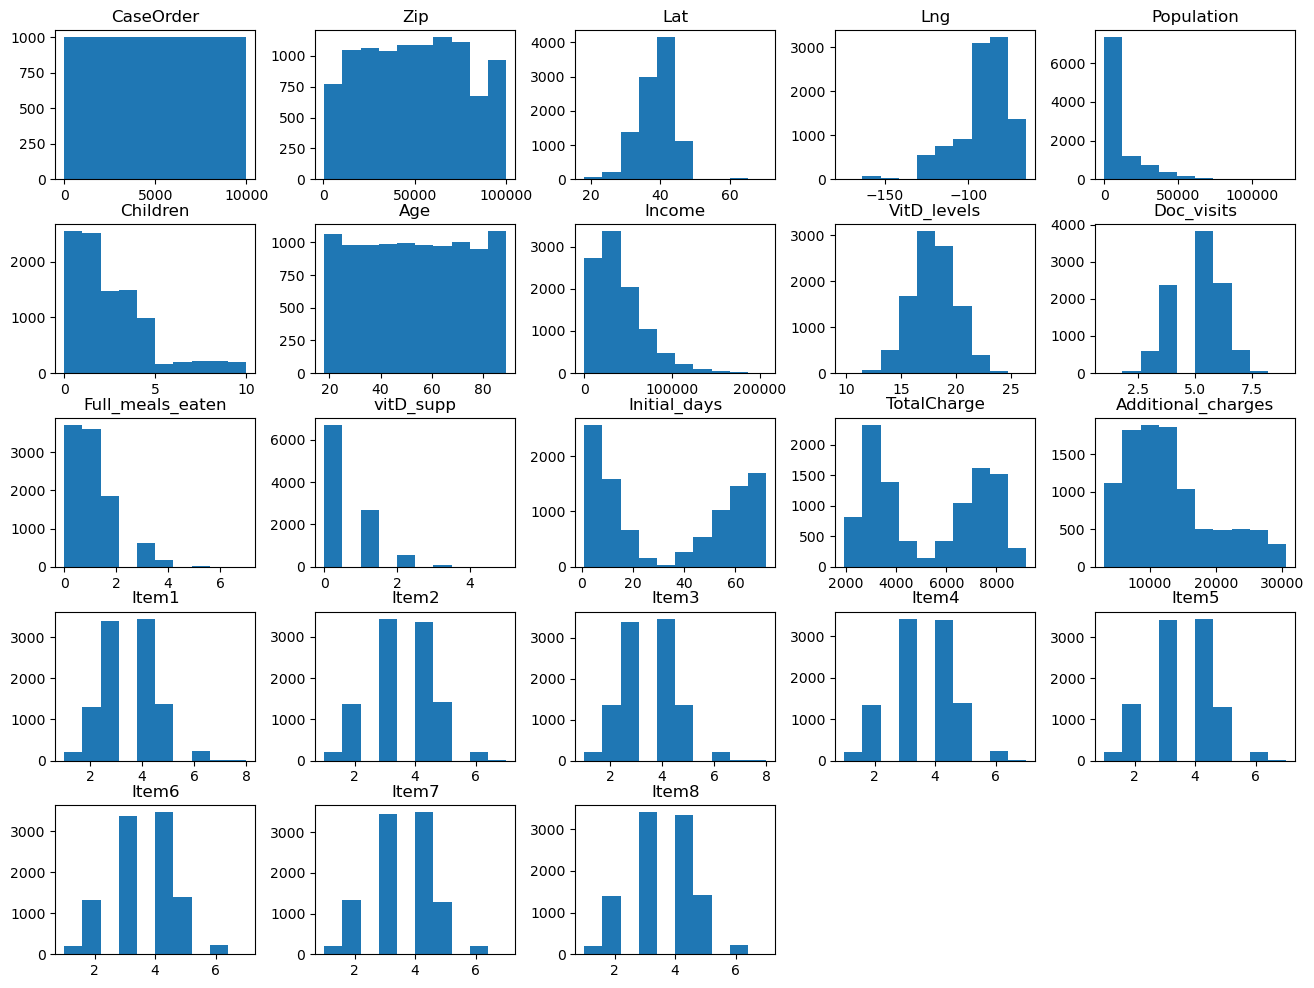

In [8]:
# Histograms of quantitative data
df.hist(grid=False, figsize=(16,12), layout=[5,5])

In [9]:
# Checking for missing data
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [10]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

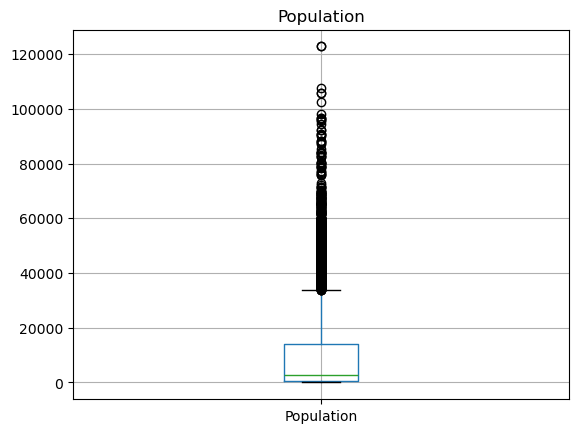

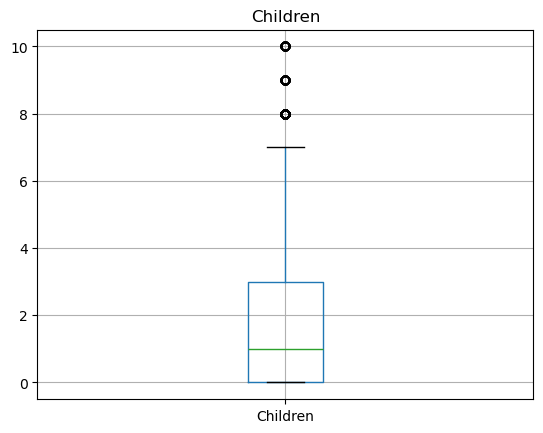

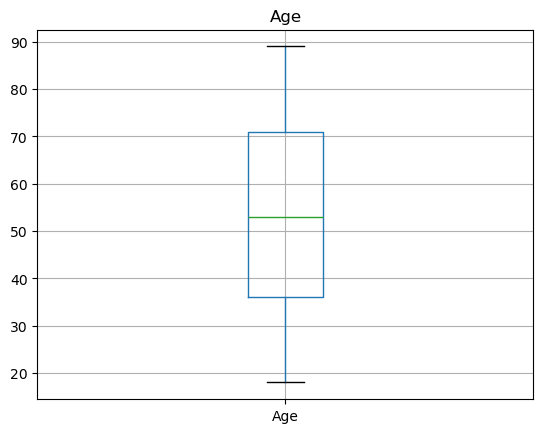

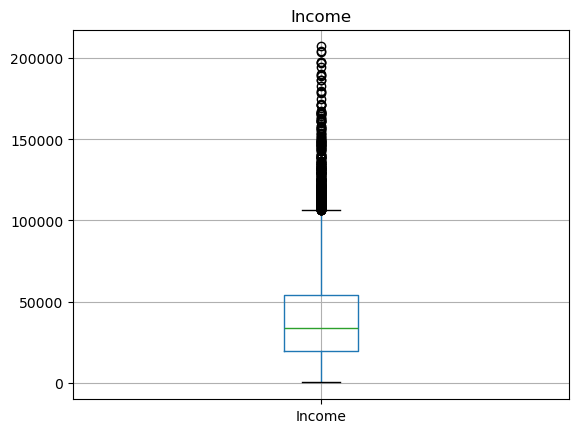

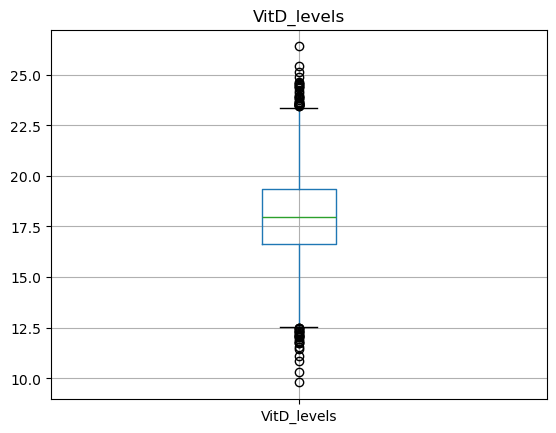

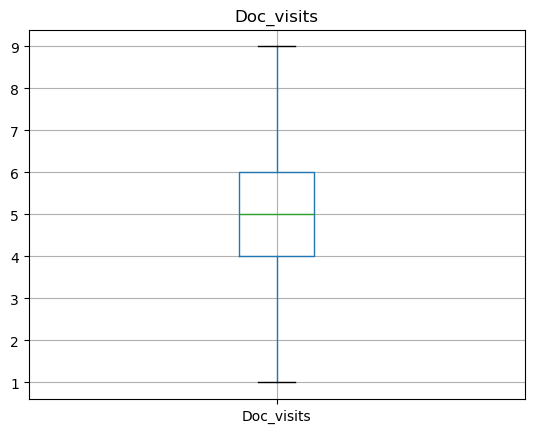

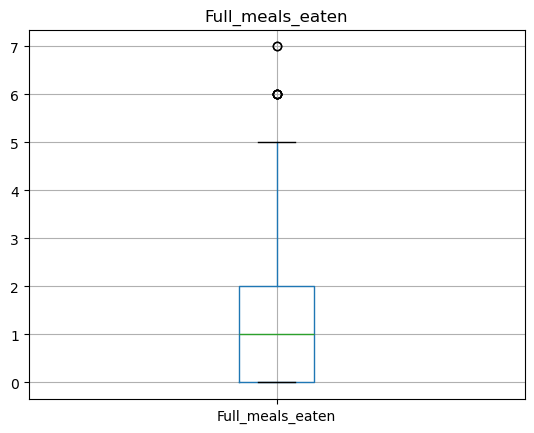

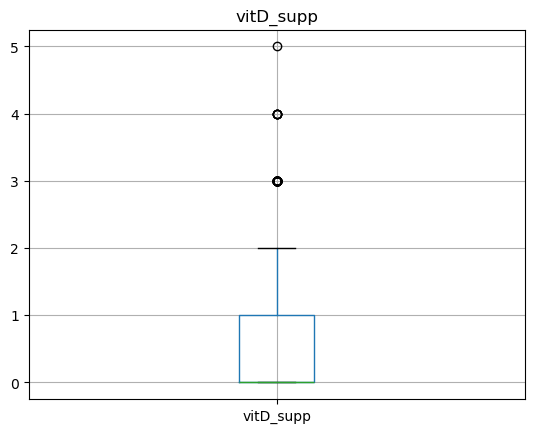

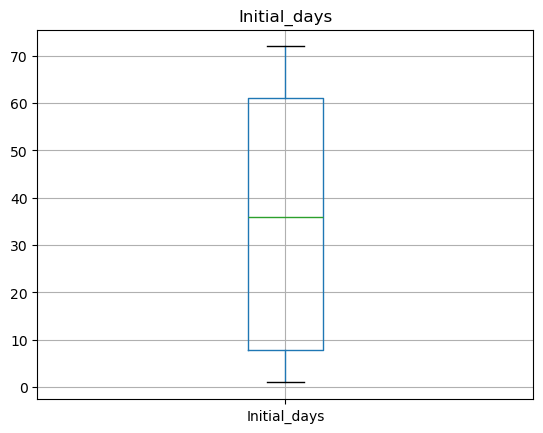

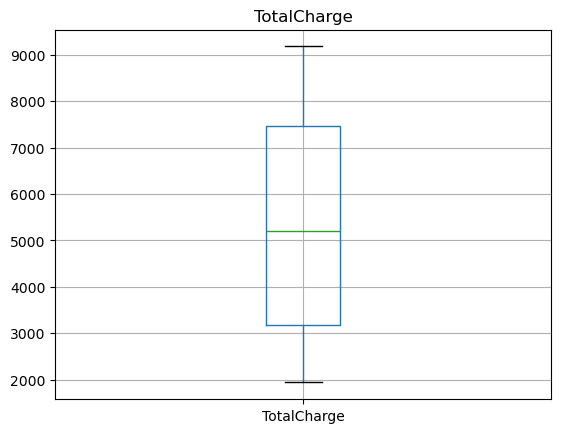

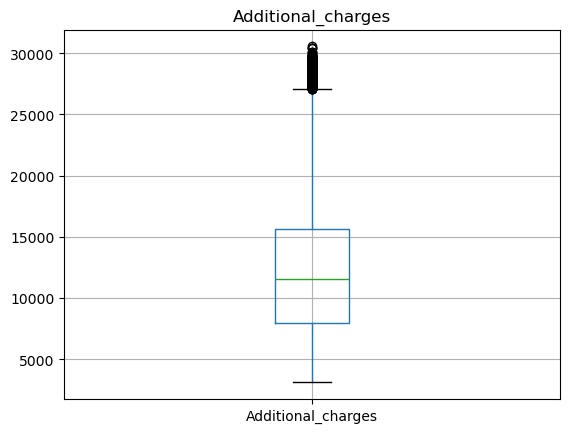

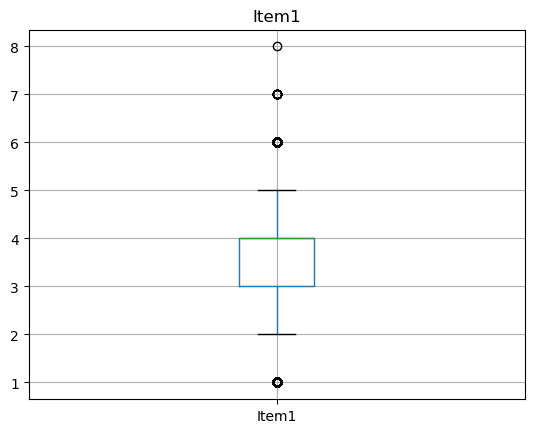

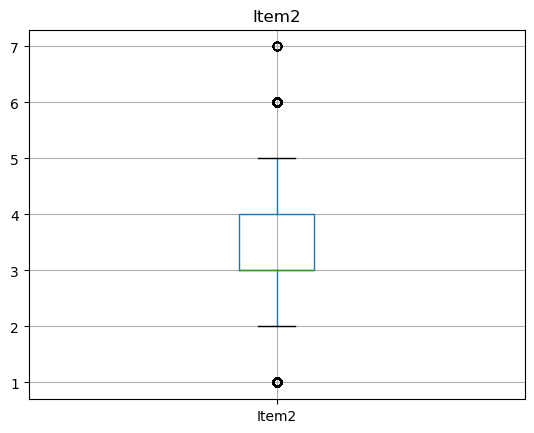

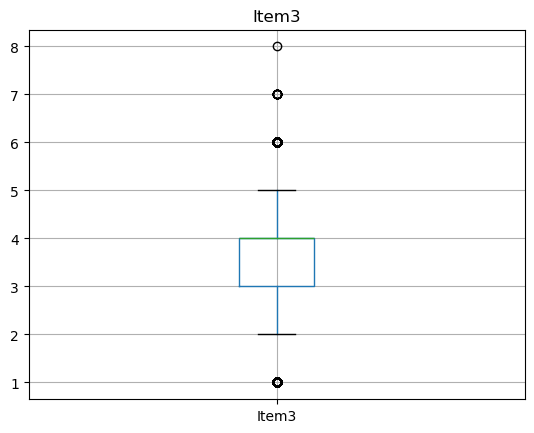

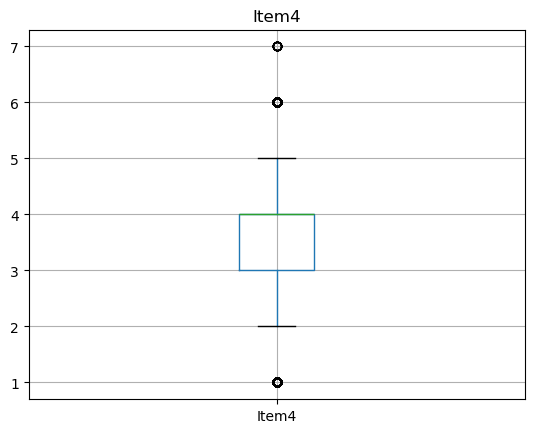

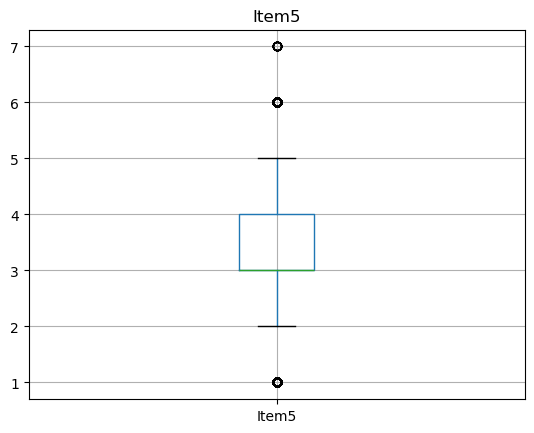

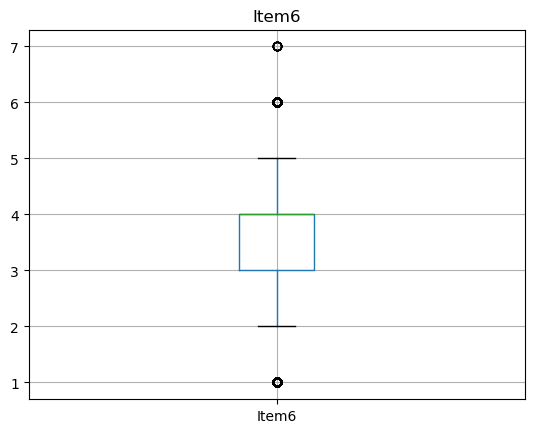

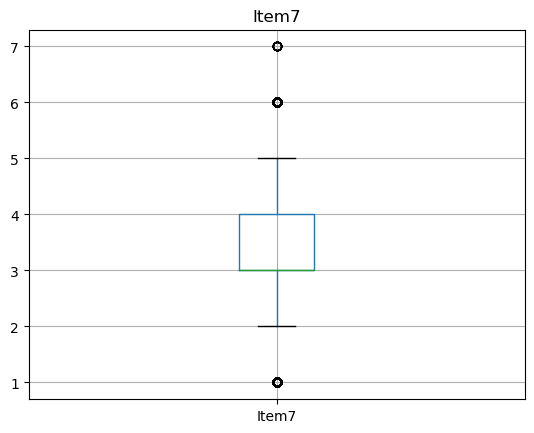

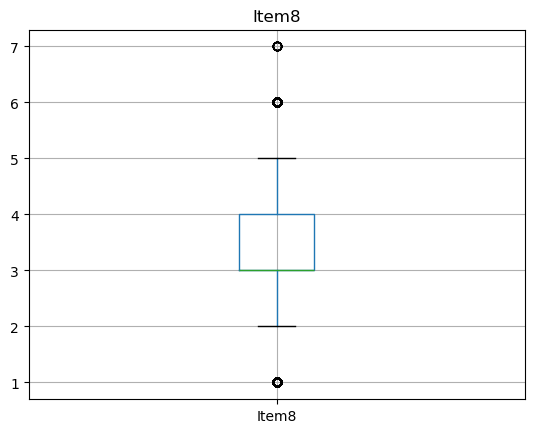

In [11]:
# Checking for outliers in quantitative variables

quant_columns = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

In [12]:
# Drop unneeded columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)


In [13]:
# Verify remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Population          10000 non-null  int64  
 3   Children            10000 non-null  int64  
 4   Age                 10000 non-null  int64  
 5   Income              10000 non-null  float64
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Initial_days        10000 non-null  float64
 11  TotalCharge         10000 non-null  float64
 12  Additional_charges  10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [14]:
# Rename column to fit data dictionary
df = df.rename(columns={'vitD_supp': 'VitD_supp'})


In [15]:
# Remove outliers / replace with medians / round columns / recast as needed

In [16]:
# Population
df['Population'] = np.where(df['Population'] > 39629, np.nan, df['Population'])
df['Population'].fillna(df['Population'].median(), inplace=True)                                                                

In [17]:
# Children
df['Children'] = np.where(df['Children'] > 5, np.nan, df['Children'])
df['Children'].fillna(df['Children'].median(), inplace=True)
# Recast as int
df['Children'] = df['Children'].astype(int)

In [18]:
# Income
df['Income'] = np.where(df['Income'] > 97533, np.nan, df['Income'])
df['Income'].fillna(df['Income'].median(), inplace=True)
# Round
df['Income'] = df.Income.round(2)

In [19]:
# VitD_levels
df['VitD_levels'] = np.where(df['VitD_levels'] >= 22, np.nan, df['VitD_levels'])
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)
# Round 
df['VitD_levels'] = df.VitD_levels.round(2)

In [20]:
# Full_meals_eaten
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 3, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].fillna(df['Full_meals_eaten'].median(), inplace=True)
# Recast as int
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(int)

In [21]:
# Additional_charges
df['Additional_charges'] = np.where(df['Additional_charges'] > 27928, np.nan, df['Additional_charges'])
df['Additional_charges'].fillna(df['Additional_charges'].median(), inplace=True)
# Round
df['Additional_charges'] = df.Additional_charges.round(2)

In [22]:
# Round Initial_days
df['Initial_days'] = df.Initial_days.round(1)

In [23]:
# Round TotalCharge
df['TotalCharge'] = df.TotalCharge.round(2)

In [24]:
# Data Preprocessing via StandardScalar

In [25]:
scaler = StandardScaler()
prep_df = scaler.fit_transform(df)

In [26]:
prep_df = pd.DataFrame(prep_df, columns = df.columns)
prep_df

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.814668,0.297134,-0.420772,-0.408779,-0.024795,2.317853,0.693952,0.944647,-1.048437,-0.634713,-0.906764,-0.727186,0.922912
1,-1.463305,0.395522,0.454409,1.060064,-0.121706,0.483076,0.586803,-0.967981,1.190617,0.956445,-0.735712,-0.513228,0.868133
2,0.886966,-0.354788,1.064479,1.060064,-0.024795,-1.013343,0.115350,-0.967981,0.071090,-0.634713,-1.127231,-1.319985,0.850040
3,0.952530,-0.149403,-0.503449,-1.143201,1.186592,0.157158,-0.677550,-0.967981,0.071090,-0.634713,-1.245066,-1.460517,0.092849
4,-0.213252,0.943984,-0.175990,-0.408779,-1.526914,-1.620503,-0.216811,-0.011667,-1.048437,2.547602,-1.260271,-1.467287,-1.464061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.429820,0.855358,-0.231003,0.325643,-1.381548,0.444398,-0.463253,-0.967981,1.190617,0.956445,0.651708,0.705764,-0.589499
9996,0.126784,1.076607,-0.598910,1.794486,1.622691,-0.985068,0.179639,-0.011667,-1.048437,-0.634713,1.301704,1.114312,-0.176923
9997,-0.441353,0.259332,-0.674252,1.060064,-0.412438,1.364795,-0.382891,-0.967981,1.190617,-0.634713,1.358722,1.359596,0.476797
9998,0.990676,-0.708494,-0.701602,1.060064,-0.509349,-0.305997,1.106474,-0.011667,1.190617,0.956445,1.100243,1.069726,-0.781822


In [27]:
prep_df.describe()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.318057e-15,4.469314e-16,1.421085e-18,2.238210e-17,1.147527e-16,-1.570299e-16,-1.062261e-15,3.161915e-17,-1.136868e-17,3.694822e-17,-6.821210e-17,9.094947e-17,1.818989e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.846867e+00,-5.456450e+00,-7.299991e-01,-1.143201e+00,-1.720736e+00,-1.669198e+00,-4.304529e+00,-3.836921e+00,-1.048437e+00,-6.347126e-01,-1.271674e+00,-1.547441e+00,-1.563218e+00
25%,-6.470661e-01,-4.018288e-01,-6.571983e-01,-1.143201e+00,-8.485376e-01,-7.721216e-01,-6.521019e-01,-9.679806e-01,-1.048437e+00,-6.347126e-01,-1.009395e+00,-9.782198e-01,-7.474500e-01
50%,1.236867e-01,1.871625e-01,-4.818633e-01,-4.087792e-01,-2.479466e-02,-1.853875e-01,2.427344e-02,-1.166703e-02,7.108996e-02,-6.347126e-01,5.302643e-02,-4.505043e-02,-1.769234e-01
75%,6.095112e-01,7.106124e-01,2.423200e-01,1.060064e+00,8.474037e-01,6.132437e-01,7.153817e-01,9.446465e-01,7.108996e-02,9.564446e-01,1.016618e+00,9.849756e-01,4.092517e-01
max,5.887651e+00,1.706840e+00,3.419254e+00,2.528908e+00,1.719602e+00,2.823176e+00,2.226177e+00,3.813587e+00,2.310144e+00,7.321074e+00,1.427142e+00,1.774336e+00,2.599014e+00


In [28]:
# Write to .csv file

In [29]:
prep_df.to_csv('d212task2clean.csv', index=False)


In [ ]:
# End data preperation

In [ ]:
# Begin PCA

In [30]:
# PCA model instantiation and fitting
# Course Materials(n.d.)

In [31]:
pca()


In [32]:
pca_model = pca(n_components=13, normalize=True)
for_loadings = pca_model.fit_transform(prep_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [33]:
for_loadings

{'loadings':            Lat       Lng  Population  Children       Age    Income  \
 PC1  -0.016793 -0.008927    0.020174  0.006940  0.069294 -0.013916   
 PC2  -0.015689  0.023534   -0.007868  0.002225  0.702405 -0.026266   
 PC3   0.676126 -0.441010   -0.579579 -0.025615  0.012139 -0.082395   
 PC4   0.092118 -0.076431    0.042191 -0.115054  0.028915  0.341172   
 PC5   0.051883 -0.006448    0.007851  0.667844  0.014802 -0.098146   
 PC6   0.058749 -0.361974    0.239718  0.247504  0.008972  0.663899   
 PC7   0.072295 -0.029770    0.121498  0.457816 -0.003043 -0.343143   
 PC8  -0.060974 -0.450714    0.312811  0.215557  0.001535  0.060605   
 PC9   0.045998  0.184625   -0.132010 -0.139648  0.021189  0.446900   
 PC10 -0.063644 -0.547358    0.374254 -0.442171  0.019574 -0.321520   
 PC11 -0.715946 -0.360882   -0.578084  0.087717  0.001105  0.031841   
 PC12  0.001936  0.003959    0.005191  0.002913  0.706652  0.002400   
 PC13  0.001373 -0.000049    0.000504  0.000476  0.018446  0.0000

In [34]:
# loading matrix

In [35]:
loading_table=for_loadings['loadings']
loading_table

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
PC1,-0.016793,-0.008927,0.020174,0.006940,0.069294,-0.013916,-0.004595,-0.007237,-0.019543,0.024458,0.702571,0.703366,0.069315
PC2,-0.015689,0.023534,-0.007868,0.002225,0.702405,-0.026266,0.024266,0.016120,0.028346,0.008843,-0.074156,-0.063961,0.702673
PC3,0.676126,-0.441010,-0.579579,-0.025615,0.012139,-0.082395,0.049886,-0.012883,0.042408,0.006056,0.012859,0.012173,0.007494
PC4,0.092118,-0.076431,0.042191,-0.115054,0.028915,0.341172,-0.482437,0.173762,-0.551090,0.534857,-0.014705,-0.016947,0.014382
PC5,0.051883,-0.006448,0.007851,0.667844,0.014802,-0.098146,-0.404047,-0.521212,-0.226177,-0.234141,-0.006906,-0.010002,0.017225
PC6,0.058749,-0.361974,0.239718,0.247504,0.008972,0.663899,-0.062139,0.325837,0.228209,-0.378291,0.009586,0.010307,0.023359
PC7,0.072295,-0.029770,0.121498,0.457816,-0.003043,-0.343143,0.363839,0.573932,-0.435168,-0.015402,-0.007187,-0.007592,-0.016695
PC8,-0.060974,-0.450714,0.312811,0.215557,0.001535,0.060605,0.418411,-0.366307,0.134546,0.563212,-0.017382,-0.016294,-0.004594
PC9,0.045998,0.184625,-0.132010,-0.139648,0.021189,0.446900,0.526874,-0.330075,-0.527632,-0.248398,0.005081,0.003912,0.004012
PC10,-0.063644,-0.547358,0.374254,-0.442171,0.019574,-0.321520,-0.109135,-0.114136,-0.309249,-0.368840,-0.010172,-0.011830,0.012270


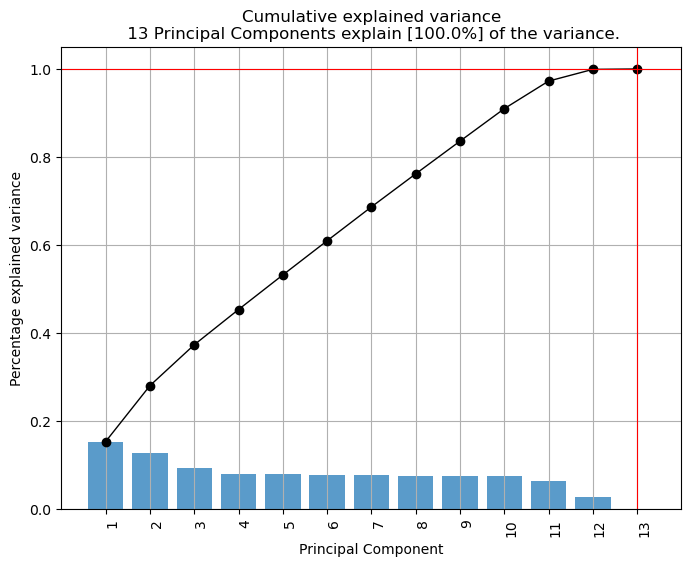

In [36]:
# Visual for cumulative variance
pca_model.plot(figsize=(8,6))
plt.show()

In [37]:
# For eigenvalues loading pca
pca = PCA(n_components=df.shape[1])
pca.fit(prep_df)


PCA(n_components=13)

In [38]:
# Selecting via kaiser rule
cov_matrix = np.dot(prep_df.T, prep_df) / df.shape[0]

In [39]:
# Eigenvalues var
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

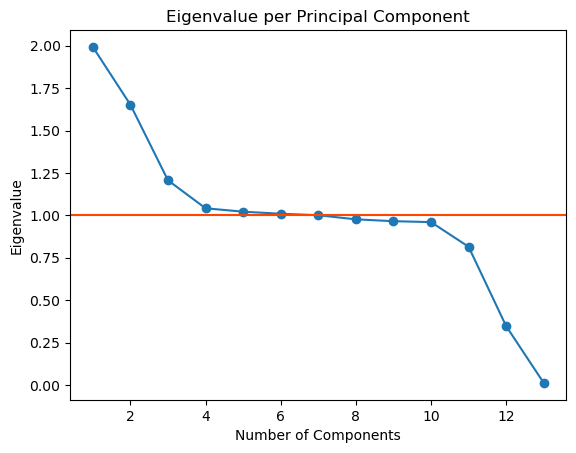

In [40]:
# Plot 
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Eigenvalue per Principal Component')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='orangered')
plt.show()

In [41]:
eigenvalues

[1.9929440277178239,
 1.6521838747840858,
 1.2064557956791913,
 1.041663299574552,
 1.021426576567132,
 1.009363133856524,
 1.0006696767161605,
 0.97642200785749,
 0.9654575062877402,
 0.960062185485212,
 0.8147771597102093,
 0.3466783910286406,
 0.01189636473523294]

In [42]:
# Variance

In [43]:
# Variance per PC
ind_var = pca.explained_variance_ratio_

In [96]:
ind_var

array([0.15330339, 0.12709107, 0.09280429, 0.08012795, 0.07857128,
       0.07764332, 0.07697459, 0.07510939, 0.07426596, 0.07385094,
       0.06267517, 0.02666757, 0.0009151 ])

In [130]:
# Readable form
print('PC1 variance explained:', ind_var[0].round(2) * 100, '%')
print('PC2 variance explained:', ind_var[1].round(3) * 100, '%')
print('PC3 variance explained:', ind_var[2].round(3) * 100, '%')
print('PC4 variance explained:', ind_var[3].round(3) * 100, '%')
print('PC5 variance explained:', ind_var[4].round(3) * 100, '%')
print('PC6 variance explained:', ind_var[5].round(3) * 100, '%')
print('PC7 variance explained:', ind_var[6].round(3) * 100, '%')


PC1 variance explained: 15.0 %
PC2 variance explained: 12.7 %
PC3 variance explained: 9.3 %
PC4 variance explained: 8.0 %
PC5 variance explained: 7.9 %
PC6 variance explained: 7.8 %
PC7 variance explained: 7.7 %


In [45]:
# Sum variance of selected PCs
sum_pca_var = np.sum(pca.explained_variance_ratio_[:7])
print('Overall Variance Explained by PCs1-7:', sum_pca_var.round(4) * 100, '%')

Overall Variance Explained by PCs1-7: 68.65 %
